In [13]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# get input data
csv_name = "Results_clean_dataset"
#csv_name = "Results_dataset3"
#csv_name = "Results_mushrooms"
df = pd.read_csv(f'./{csv_name}.csv')
df.head()

,ensemble_criterion,chi_square_percent_point_function,scale_feature_coefficient,min_accuracy_coefficient,min_number_class_per_node,sorting_method,dataset_test_size,dataset_test_categorizable,number_of_rules,cobertura,...,RuleFit_accuracy,RuleFit_f1_score,RuleFit_precision_score,RuleFit_recall_score,RuleFit_roc_auc_score,rules_accuracy,rules_f1_score,rules_precision_score,rules_recall_score,rules_roc_auc_score
0,gini,0.95,0.001,0.6,1,target_accuracy,349,349,0,1.0,...,0.848138,0.453608,0.785714,0.318841,0.648706,0.836676,0.400000,0.730769,0.275362,0.625181
1,gini,0.95,0.001,0.6,1,complexity,349,349,0,1.0,...,0.848138,0.453608,0.785714,0.318841,0.648706,0.853868,0.514286,0.750000,0.391304,0.679581
2,gini,0.95,0.001,0.6,1,chi2_statistic,349,349,0,1.0,...,0.848138,0.453608,0.785714,0.318841,0.648706,0.802292,0.000000,0.000000,0.000000,0.500000
3,gini,0.96,0.001,0.6,1,target_accuracy,349,349,0,1.0,...,0.848138,0.453608,0.785714,0.318841,0.648706,0.830946,0.351648,0.727273,0.231884,0.605228
4,gini,0.96,0.001,0.6,1,complexity,349,349,0,1.0,...,0.848138,0.453608,0.785714,0.318841,0.648706,0.845272,0.480769,0.714286,0.362319,0.663302


/var/folders/m3/06npm5752654l0l9zry_3b0h0000gn/T/ipykernel_7491/2036875143.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_df.groupby([" cobertura"])[" RuleFit_f1_score", " rules_f1_score", " tree_f1_score", " ensemble_f1_score"]\


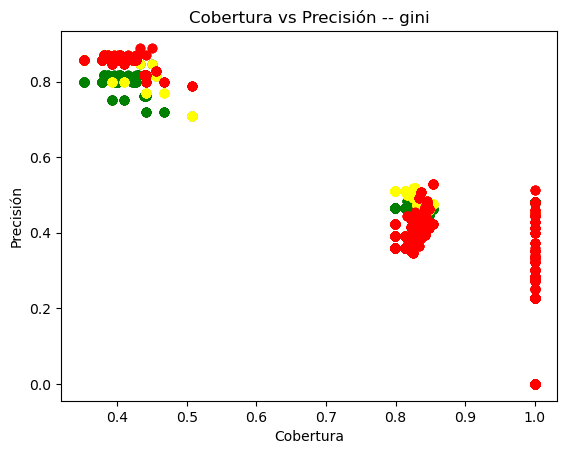

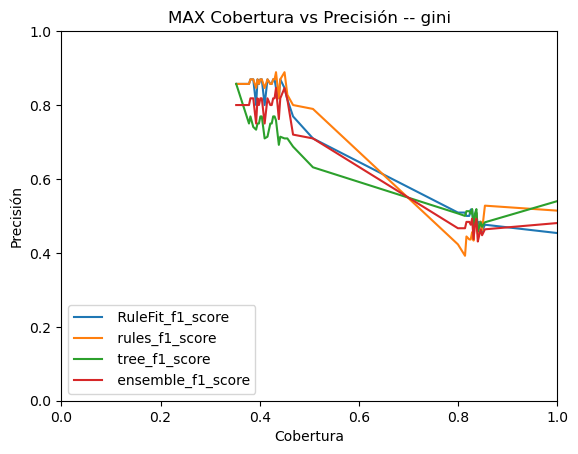

/var/folders/m3/06npm5752654l0l9zry_3b0h0000gn/T/ipykernel_7491/2036875143.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_df.groupby([" cobertura"])[" RuleFit_f1_score", " rules_f1_score", " tree_f1_score", " ensemble_f1_score"]\


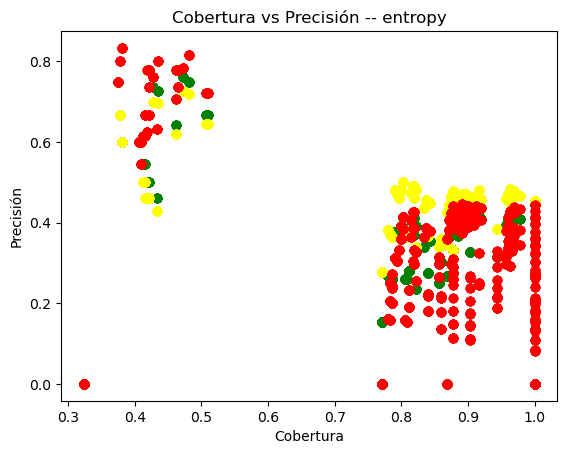

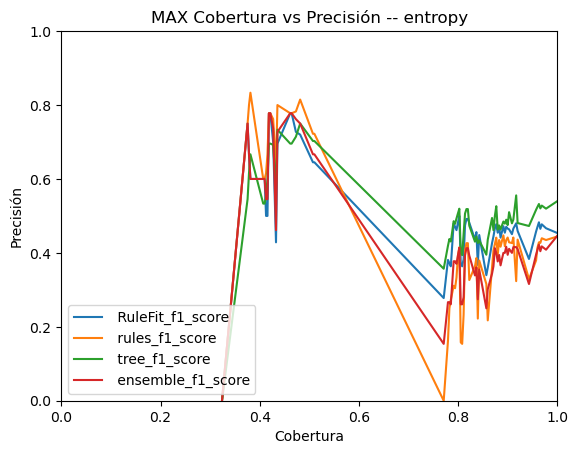

/var/folders/m3/06npm5752654l0l9zry_3b0h0000gn/T/ipykernel_7491/2036875143.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_df.groupby([" cobertura"])[" RuleFit_f1_score", " rules_f1_score", " tree_f1_score", " ensemble_f1_score"]\


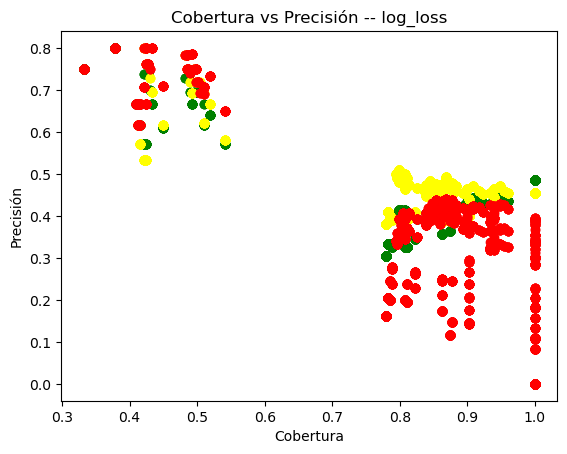

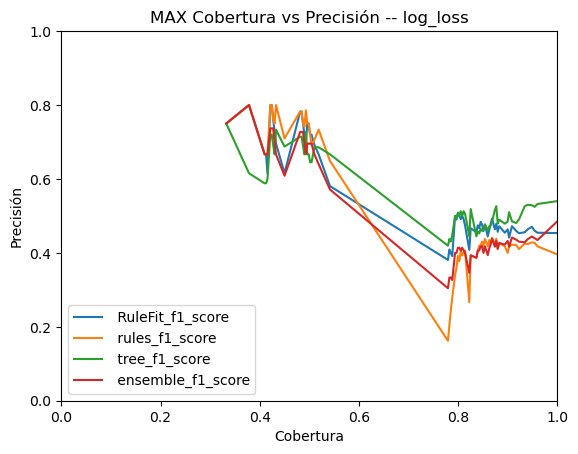

In [14]:

for node_value in df["ensemble_criterion"].unique():
       fig, ax = plt.subplots()
       new_df = df.query(f'ensemble_criterion == \"{node_value}\"')

       ax.scatter(new_df[" cobertura"], new_df[" ensemble_f1_score"], color="green", label="ensemble_f1_score")
       #ax.scatter(new_df[" cobertura"], new_df[" tree_f1_score"], color="blue", label="tree_f1_score")
       ax.scatter(new_df[" cobertura"], new_df[" RuleFit_f1_score"], color="yellow", label="RuleFit_f1_score")
       ax.scatter(new_df[" cobertura"], new_df[" rules_f1_score"], color="red", label="rules_f1_score")

       new_df.groupby([" cobertura"])[" RuleFit_f1_score", " rules_f1_score", " tree_f1_score", " ensemble_f1_score"]\
              .max()\
              .plot(legend=True, xlabel='Cobertura',ylabel='Precisión',
                    title=f'MAX Cobertura vs Precisión -- {node_value}')

       ax.set(xlabel='Cobertura',ylabel='Precisión',
              title=f'Cobertura vs Precisión -- {node_value}')
       plt.legend(loc="lower left")
       plt.ylim(0.0, 1.0)
       plt.xlim(0.0, 1.0)
       plt.show()